# Parse Uncabled Raw Data

Install packages and the virtual environment as described by the instructions in the README file.

The mi-instrument toolbox, used to parse raw datafiles, is set up to be run from the shell. To keep things contained within the notebook, we will execute the commands using subprocess.


In [97]:
import subprocess

The example raw data files are obtained at:

https://rawdata-intra.oceanobservatories.org/files/GS01SUMO/D00003/cg_data/dcl12/metbk2/

https://rawdata-intra.oceanobservatories.org/files/GS01SUMO/D00003/cg_data/dcl16/velpt/

The path to the driver/parser is in the mi-instrument repo. This information is contained in the GitHub ingestion files. In this case, this is the file of interest:

https://github.com/ooi-integration/ingestion-csvs/blob/master/GS01SUMO/GS01SUMO_D00003_ingest.csv


`<ddriver/parser>`
```
mi.dataset.driver.metbk_a.dcl.metbk_a_dcl_telemetered_driver
mi.dataset.driver.velpt_ab.dcl.velpt_ab_dcl_telemetered_driver
```

Next, specify the following parsed dataset output options:

```
--fmt csv
--fmt pd-pickle
```

For this example, we will choose the --fmt csv output type and specify the path to the raw data files. See fully qualified getMETBK and getVELPT commands below.

In [99]:
getMETBK = 'python -m utils.parse_file --fmt csv --out ./parsed_data \
mi.dataset.driver.metbk_a.dcl.metbk_a_dcl_telemetered_driver \
./raw_data/20170428.metbk2.log \
&> ./parsed_data/METBK_parserLOG.txt'
print subprocess.call(getMETBK, shell=True) # if output 0 then it ran without error


1


In [177]:
getVELPT = 'python -m utils.parse_file --fmt csv --out /Users/leila/Documents/OOI_GitHub_repo/repos/ooi_local_processing/uncabled-inst-routine/parsed_data mi.dataset.driver.velpt_ab.dcl.velpt_ab_dcl_telemetered_driver /Users/leila/Documents/OOI_GitHub_repo/repos/ooi_local_processing/uncabled-inst-routine/raw_data/20170428.velpt.log &> /Users/leila/Documents/OOI_GitHub_repo/repos/ooi_local_processing/uncabled-inst-routine/parsed_data/VELPT_parserLOG.txt'
print subprocess.call(getVELPT, shell=True) # if output 0 then it ran without error

1


Running this command should have produce the following files in your ooi_local_processing working directory:
```
metbk_a_dcl_instrument.csv
METBK_parserLOG.txt

velpt_ab_dcl_instrument.csv
VELPT_parserLOG.txt
```
Now lets inspect what is in the csv.

In [8]:
import pandas as pd

In [101]:
parsed_metbk = pd.read_csv('/Users/leila/Documents/OOI_GitHub_repo/repos/ooi_local_processing/uncabled-inst-routine/parsed_data/metbk_a_dcl_instrument.csv')
parsed_metbk.head()

,dim_0,air_temperature,barometric_pressure,driver_timestamp,eastward_wind_velocity,longwave_irradiance,northward_wind_velocity,pkt_format_id,pkt_version,port_timestamp,precipitation,preferred_timestamp,quality_flag,relative_humidity,sea_surface_conductivity,sea_surface_temperature,shortwave_irradiance,stream_name
0,0,7.470,985.09,3.722267e+09,9.18,269.1,2.34,JSON_Data,1,3.702326e+09,51.08,port_timestamp,ok,70.454,3.5056,7.717,2.4,metbk_a_dcl_instrument
1,1,7.447,984.74,3.722267e+09,9.51,266.8,2.56,JSON_Data,1,3.702326e+09,50.80,port_timestamp,ok,69.923,3.5057,7.621,2.0,metbk_a_dcl_instrument
2,2,7.417,984.74,3.722267e+09,9.72,264.7,2.55,JSON_Data,1,3.702327e+09,50.76,port_timestamp,ok,67.449,3.5056,7.888,2.1,metbk_a_dcl_instrument
3,3,7.440,985.02,3.722267e+09,9.73,264.7,2.34,JSON_Data,1,3.702327e+09,50.86,port_timestamp,ok,67.236,3.5053,7.699,2.0,metbk_a_dcl_instrument
4,4,7.425,984.95,3.722267e+09,9.88,264.7,2.40,JSON_Data,1,3.702327e+09,50.75,port_timestamp,ok,66.301,3.5050,7.695,2.0,metbk_a_dcl_instrument


In [102]:
parsed_velpt = pd.read_csv('/Users/leila/Documents/OOI_GitHub_repo/repos/ooi_local_processing/uncabled-inst-routine/parsed_data/velpt_ab_dcl_instrument.csv')
parsed_velpt.head()

,dim_0,amplitude_beam1,amplitude_beam2,amplitude_beam3,analog1,battery_voltage_dV,date_time_string,driver_timestamp,error_code,heading_decidegree,...,pressure_mbar,quality_flag,roll_decidegree,sound_speed_dms,status,stream_name,temperature_centidegree,velocity_beam1,velocity_beam2,velocity_beam3
0,0,88,88,92,0,116,2017/04/28 00:00:08,3.722365e+09,0,1851,...,13129,ok,-32,14813,17,velpt_ab_dcl_instrument,770,-172,151,-116
1,1,79,80,78,0,116,2017/04/28 00:15:01,3.722365e+09,0,1808,...,13152,ok,-32,14813,17,velpt_ab_dcl_instrument,770,-153,57,9
2,2,76,79,76,0,116,2017/04/28 00:31:04,3.722365e+09,0,1721,...,13142,ok,-30,14812,33,velpt_ab_dcl_instrument,769,-116,63,-18
3,3,80,78,79,0,116,2017/04/28 00:45:01,3.722365e+09,0,2044,...,13147,ok,-24,14812,17,velpt_ab_dcl_instrument,769,-105,62,-26
4,4,92,95,96,0,116,2017/04/28 01:00:06,3.722365e+09,0,2025,...,13148,ok,-27,14812,17,velpt_ab_dcl_instrument,768,-143,66,-3


In [160]:
# Step 1: select the same time range
parsed_metbk = parsed_metbk.loc[(parsed_metbk['port_timestamp'] > time_velpt[0]) & (parsed_metbk['port_timestamp'] < time_velpt[len(u)-1])]

Now lets run this parsed L0 data, as it would be stored in Cassandra, through the applicable OOI Data Product Algorithm (also known as `ion-function`) along with the correct calibration values applied.

We are looking at data from deployment-3 (2017-04-28), which means that on that date, the unique instrument identifier (UID) CGINS-METLGR-00036 and CGINS-VELPTA-1274 were in the water, according to the GS01SUMO platform deployment sheet on GitHub.

https://github.com/ooi-integration/asset-management/blob/master/deployment/GS01SUMO_Deploy.csv

This then lets us identify and pull the correct calibration sheet, which has been placed in the calibration_data folder, and can be found here: (VLPTA has no calibration files)

https://github.com/ooi-integration/asset-management/blob/master/calibration/METBKA/CGINS-METLGR-00036__20161125.csv


In [10]:
# Step 2: read the calibration file
cal_values = pd.read_csv('/Users/leila/Documents/OOI_GitHub_repo/repos/ooi_local_processing/uncabled-inst-routine/calibration_data/CGINS-METLGR-00036__20161125.csv', index_col= 'name')
cal_values

,serial,value,notes
name,,,
CC_depth_of_conductivity_and_temperature_measurements_m,LGR036,0.81,NaN
CC_height_of_air_humidity_measurement_m,LGR036,5.76,NaN
CC_height_of_air_temperature_measurement_m,LGR036,5.76,NaN
CC_height_of_windspeed_sensor_above_sealevel_m,LGR036,6.29,NaN
CC_jcool,LGR036,1.00,Constant
CC_jwarm,LGR036,1.00,Constant
CC_zinvpbl,LGR036,600.00,Constant
CC_use_velpt,LGR036,1.00,NaN


Now that we have our parsed L0 and calibration data loaded, we are ready to import the correct ion-fuction to process the data. 

For METBK instrument, we will process the L1 `met_relwind_speed` data product from the L0 `northward_wind_velocity` and `eastward_wind_velocity` values in the csv. Other data product will be generated in the process to calculate the relative wind velocity components `met_windavg_mag_corr_north` and `met_windavg_mag_corr_east`. 
The METBK data products also need input from the co-located instrument VELPT. The L0 data products `velocity_beam1` and `velocity_beam2` will be used to generate the L1 data products `northward_velocity` and `eastward_velocity`.

http://ooi.visualocean.net/parameters/view/3073

Again, the group of functions being used to calculate a given data product can be identified on the Data Team Portal and accessed via github:

METBK instrument:
http://ooi.visualocean.net/parameter-functions/view/149

https://github.com/oceanobservatories/ion-functions/blob/master/ion_functions/data/met_functions.py

VELPT instrument:
http://ooi.visualocean.net/parameter-functions/view/106

https://github.com/oceanobservatories/ion-functions/blob/master/ion_functions/data/vel_functions.py

In [11]:
from ion_functions.data.met_functions import met_windavg_mag_corr_east
from ion_functions.data.met_functions import met_windavg_mag_corr_north

In [204]:
# prepare your inputs for the function
uu = parsed_metbk['eastward_wind_velocity'].values
vv = parsed_metbk['northward_wind_velocity'].values
time_ntp = parsed_metbk['port_timestamp'].values
a1 = cal_values.loc['CC_height_of_windspeed_sensor_above_sealevel_m'].values
a2 = cal_values.loc['CC_use_velpt'].values
lon=-89.35673333
lat=-54.4076

In [166]:
# run the function to get the corrected wind velocities
# This line is from preload. Parameter Function Map:{"zwindsp": "CC_height_of_windspeed_sensor_above_sealevel_m", "uu": "PD1059", "timestamp": "PD7", "lon": "CC_lon", "vv": "PD1060", "lat": "CC_lat"}
uu_cor = met_windavg_mag_corr_east(uu, vv, lat, lon, time_ntp, zwindsp=a1)
vv_cor = met_windavg_mag_corr_north(uu, vv, lat, lon, time_ntp, zwindsp=a1)

In [173]:
print len(uu_cor)
print len(vv_cor)

1249
1249


In [168]:
from ion_functions.data.vel_functions import velpt_mag_corr_east
from ion_functions.data.vel_functions import velpt_mag_corr_north

In [169]:
# prepare your inputs for the function
u = parsed_velpt['velocity_beam1'].values
v = parsed_velpt['velocity_beam2'].values
time_velpt = parsed_velpt['internal_timestamp']

In [170]:
# run the function to get the corrected sea water velocities
# This line is from preload. Parameter Function Map:{"lat": "CC_lat", "lon": "CC_lon", "u": "PD441", "timestamp": "PD7", "v": "PD442"}
vle_water = velpt_mag_corr_east(u, v, lat, lon, time_velpt)
vln_water = velpt_mag_corr_north(u, v, lat, lon, time_velpt)
print len(vle_water)
print len(vln_water)

96
96


In [174]:
from ion_functions.data.met_functions import met_relwind_speed

In [185]:
# run the function to get the relative wind speed
# This line is from preload. Parameter Function Map:{"vln_wind":"PD3069", "vle_water": "PD1154", "use_velptmn_with_metbk": "CC_use_velpt", "vle_wind": "PD3068", "vln_water": "PD1155"}
u_rel = met_relwind_speed(uu_cor, vv_cor, vle_water=None, vln_water=None, use_velptmn_with_metbk=0)
print 'real wind velocity', u_rel

real wind velocity [  8.43029062   9.07449172   8.47432003 ...,  11.91389945  11.68065923
  11.94355056]


In [186]:
import datetime

In [187]:
# convert those ntp epoch timestamps (seconds since 1900)
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_ordinal = ntp_epoch.toordinal()
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta) #.replace(microsecond=0)

time_parser = []
for i in time_ntp:
    time_parser.append(ntp_seconds_to_datetime(i))
print time_parser[0]
print time_parser[-1]

2017-04-28 00:27:28.230000
2017-04-28 23:44:31.410000


Now that we have a human readable timestamp and the L1 data product, time to compare these data to the data output by OOI net.

# Import OOINet Processed Data

In [188]:
import xarray as xr

In [189]:
# import the data from an asynchronously produced NetCDF file served up on THREDDS.
ds = xr.open_dataset('./ooi_data/deployment0003_GS01SUMO-SBD12-06-METBKA000-telemetered-metbk_a_dcl_instrument_20161125T011152.985000-20171207T150458.590000.nc',decode_times=True, mask_and_scale=False)
ds=ds.swap_dims({'obs':'time'})

In [190]:
# select the subset of time that matches the time array in the raw data file
ds_dim = ds.sel(time=slice(time_parser[0],time_parser[-1]))

In [191]:
# extract the ooinet relative wind speed and time
met_relwind_speed_ooinet = ds_dim.met_relwind_speed.values
time_ooinet = ds_dim.port_timestamp.values

# Compare Locally Processed Data to OOINet Output
Let's start by visually comparing two data frames.

In [192]:
# df will be the dataframe that contains the locally parsed time stamps and velocity values
df = pd.DataFrame(u_rel, columns=['u_rel'])
df['time_parser'] = time_parser

In [193]:
# df_nc will contain the time stamps and temperature values produced by ooinet
df_nc = pd.DataFrame(met_relwind_speed_ooinet, columns=['met_relwind_speed_ooinet'])
df_nc['time_ooinet'] = time_ooinet

In [194]:
# data frame lengths are identical
print len(df)
print len(df_nc)

# neither contain NaNs or null values
print df.isnull().values.any()
print df_nc.isnull().values.any()

1249
1248
False
False


In [195]:
# visually they look the same
df.tail() # locally processed

,u_rel,time_parser
1244,12.307591,2017-04-28 23:40:45.930
1245,12.322082,2017-04-28 23:41:50.310
1246,11.913899,2017-04-28 23:42:22.440
1247,11.680659,2017-04-28 23:43:26.720
1248,11.943551,2017-04-28 23:44:31.410


In [196]:
df_nc.tail() # ooinet processed

,met_relwind_speed_ooinet,time_ooinet
1243,12.499274,2017-04-28 23:40:45.926000128
1244,12.510379,2017-04-28 23:41:50.312999936
1245,12.092984,2017-04-28 23:42:22.435999744
1246,11.862077,2017-04-28 23:43:26.723999744
1247,12.127467,2017-04-28 23:44:31.409999872


A final check reveals that one data point appears to have been swapped between the raw data file that was written directly to the OOINet Cassandra database, and the files that were written out to the raw data archive. Raw cabled data streaming in live gets written directly to the Cassandra database, while the raw data files are written out to the archive via a seperate pipeline. There is likely a bug in one of these two pipelines. Ideally, the raw data files should be written out from the Cassandra database, but we haven't gotten there yet.

In [203]:
# get the numerical diff
test = u_rel[0:1248] - met_relwind_speed_ooinet[0:1248]

# find all values that are not 0
[i for i,x in enumerate(test) if x != 0]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [205]:
# some plots for good measure
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

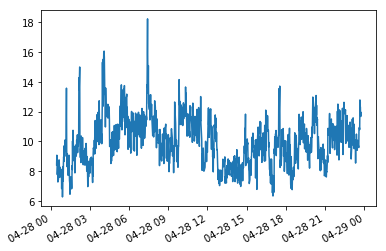

In [206]:
# locally processed
fig, ax = plt.subplots()
ax.plot(time_parser,u_rel)
fig.autofmt_xdate()

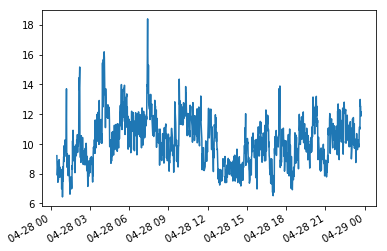

In [207]:
# ooinet processed
fig, ax = plt.subplots()
ax.plot(time_ooinet,met_relwind_speed_ooinet)
fig.autofmt_xdate()

This exercise demonstrates the processing chain from raw to processed data product using publicly available code, raw data files and metadata. These data and additional data products could be further assembled into a NetCDF, as is produced by OOINet. This was never necessary for data evaluation purposes and should not prevent scientists from validating the output of OOINet. The "first-in-class" review effort revealed all steps in the data product processing chain, which allowed the Data Team to diagnose the root cause of issues and work with the appropriate team to find a fix.

Stream Engine (uFrame) can be considered an assembly engine that brings together raw data, parsers, algorithms and metadata on demand and in real-time to produce a final NetCDF file (asynchronously) or a real-time JSON data response (synchronously). The Stream Engine code is available on GitHub, but was not used in this exercise, because it is not necessary to recreate the processing pipeline from raw, through parsed and finally processed data.

https://github.com/oceanobservatories/stream_engine